<a href="https://colab.research.google.com/github/CollinsRutto/Social-Media-Analysis-and-scrapping/blob/main/Histogram_%26_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install textblob

In [7]:
pip install requests

Summary of Run:
Total tweets: 100
Total favorites: 368615
Total retweets: 67506


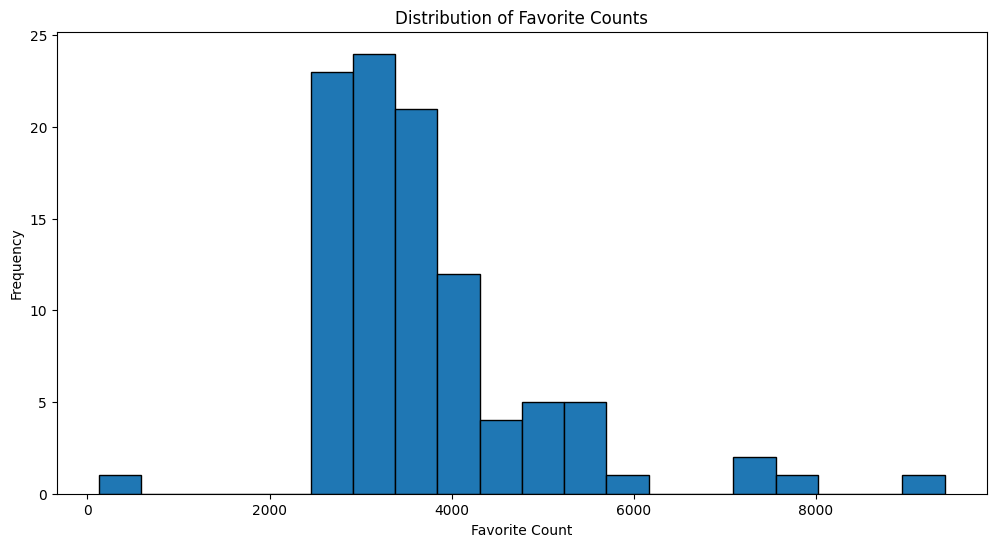

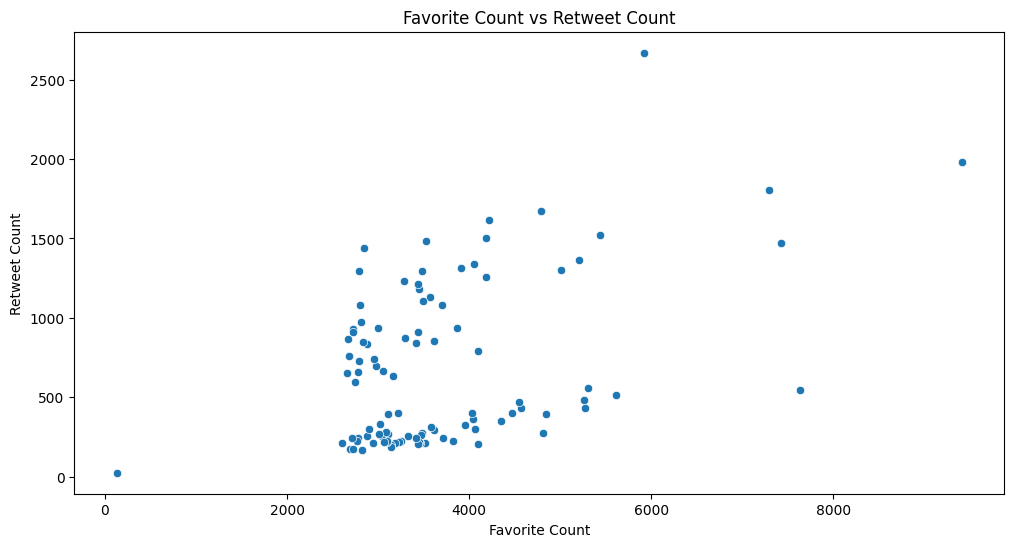

In [8]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import requests

# Specify the URL to fetch JSON data
url = "https://api.apify.com/v2/datasets/4FCa01p28r0EMFIkH/items?clean=true&format=json"

try:
    # Make an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse JSON data from the response
        data = response.json()

        # Extract relevant data
        user_names = [tweet['user']['name'] for tweet in data]
        tweet_texts = [tweet['full_text'] for tweet in data]
        tweet_favorites = [tweet['favorite_count'] for tweet in data]
        tweet_retweets = [tweet['retweet_count'] for tweet in data]

        # Calculate summary statistics
        total_tweets = len(data)
        total_favorites = sum(tweet_favorites)
        total_retweets = sum(tweet_retweets)

        # Print summary statistics
        print("Summary of Run:")
        print(f"Total tweets: {total_tweets}")
        print(f"Total favorites: {total_favorites}")
        print(f"Total retweets: {total_retweets}")

        # Matplotlib visualization
        plt.figure(figsize=(12, 6))
        plt.hist(tweet_favorites, bins=20, edgecolor='black')
        plt.title('Distribution of Favorite Counts')
        plt.xlabel('Favorite Count')
        plt.ylabel('Frequency')
        plt.savefig('favorite_count_histogram.png')

        # Seaborn visualization
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x=tweet_favorites, y=tweet_retweets)
        plt.title('Favorite Count vs Retweet Count')
        plt.xlabel('Favorite Count')
        plt.ylabel('Retweet Count')
        plt.savefig('favorite_vs_retweet.png')

        # Plotly visualization
        fig = go.Figure()
        fig.add_trace(go.Bar(x=user_names, y=tweet_favorites, name='Favorite Count'))
        fig.add_trace(go.Bar(x=user_names, y=tweet_retweets, name='Retweet Count'))
        fig.update_layout(title='Favorite and Retweet Counts by User',
                          xaxis_title='User', yaxis_title='Count',
                          barmode='group')
        fig.write_html('favorite_and_retweet_by_user.html')

    else:
        # Display an error message if the request was unsuccessful
        print(f"Error: HTTP status code {response.status_code} - {response.reason}")

except Exception as e:
    # Display an error message if any exception occurs
    print(f"Error fetching JSON data from URL: {e}")
